In [43]:
import json
with open("qa_bio.json", "r+") as file:
    data = json.load(file)

In [44]:
# data to save
question = []
answer = []
medicalSpecialties = []
number_specialist = []
for api_json in data["newsfeeds"]:
    api_json_newfeed = api_json.get("question")
    question.append(api_json_newfeed.get("content"))
    answer.append(api_json_newfeed.get("comments"))
    list_specialist = api_json_newfeed.get('medicalSpecialties')
    if list_specialist is not None:
        list_value_ = []
        for specialist in list_specialist:    
            list_value_.append(specialist.get("name"))
        number_specialist.append(len(list_specialist))
        medicalSpecialties.append(list_value_)
    else:
        medicalSpecialties.append(None)
        number_specialist.append(None)

In [45]:
import pandas as pd
datax = pd.DataFrame({"qestion":question,"answer": answer,"special_list":medicalSpecialties,"number_specialist":number_specialist})
datax.to_csv("unique_patient.csv",index =False)

In [25]:
question = []
answer = []
medicalSpecialties = []
number_specialist = []
list_value_ = []
for api_json in data["newsfeeds"]:
    api_json_newfeed = api_json.get("question")
    list_specialist = api_json_newfeed.get('medicalSpecialties')
    if list_specialist is not None:
        for specialist in list_specialist:    
            list_value_.append(specialist.get("name"))
            question.append(api_json_newfeed.get("content"))
            answer.append(api_json_newfeed.get("comments"))
            list_specialist = api_json_newfeed.get('medicalSpecialties')

In [15]:
len(medicalSpecialties)

5082

In [26]:
import pandas as pd
datax = pd.DataFrame({"qestion":question,"answer": answer,"special_list":list_value_})
datax

,qestion,answer,special_list
0,"Xin chào bác sĩ,cho em hỏi cách chữa bệnh viêm...",Chào bạn!\nMục tiêu của điều trị là làm thuyên...,di_ung
1,"Xin chào bác sĩ,cho em hỏi cách chữa bệnh viêm...",Chào bạn!\nMục tiêu của điều trị là làm thuyên...,tai_mui_hong
2,"Xin chào bác sĩ,\nEm thường xuyên ngủ ngáy, nh...",Chào bạn \nNgủ ngáy có thể do những nguyên nhâ...,ho_hap
3,"Xin chào bác sĩ,\nBác sĩ cho e hỏi, e với bạn ...",Chào em.\nTrước hết hãy có những kiến thức về ...,nam_khoa
4,"Xin chào bác sĩ,\nTôi ăn uống nhiều đầy đủ,như...",Chào bạn. \nMuốn tăng cân nên xây dựng cho mìn...,dinh_duong
...,...,...,...
5077,"Xin chào bác sĩ,\nEm năm nay 23t . Cao 1m67 nă...",Chào bạn\nTình trạng của bạn đã được các bác s...,noi_than_kinh
5078,"Xin chào bác sĩ,\nEm năm nay 23t . Cao 1m67 nă...",Chào bạn\nTình trạng của bạn đã được các bác s...,noi_khoa
5079,"Xin chào bác sĩ,\nEm năm nay 23t . Cao 1m67 nă...",Chào bạn\nTình trạng của bạn đã được các bác s...,tam_ly_tam_than
5080,"Xin chào bác sĩ, năm nay tôi 31 tuổi, có dấu ...","""Chào bạn,\nCó nhiều nguyên nhân gây ra rụng t...",da_lieu


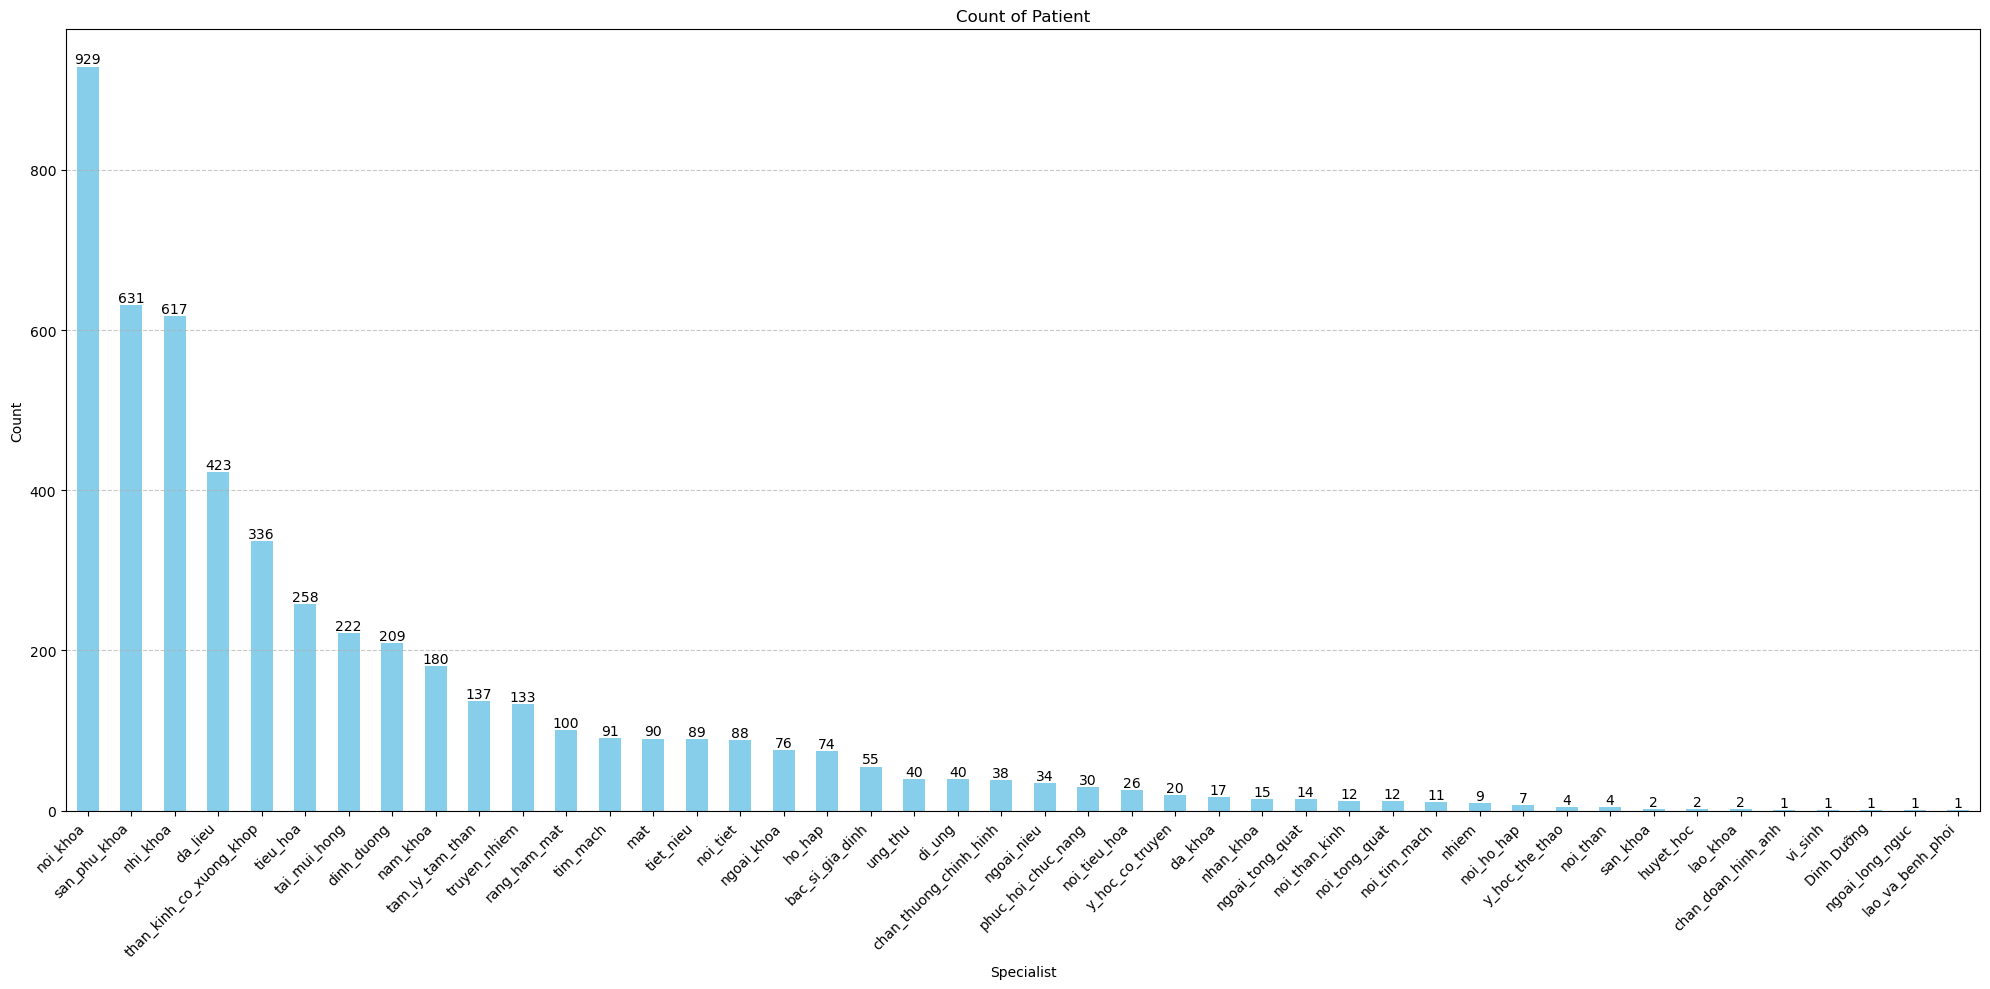

In [39]:
# data to analyst
counts = datax['special_list'].value_counts()
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
bars = counts.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{bar.get_height()}', ha='center', va='bottom')

plt.title('Count of Patient')
plt.xlabel('Specialist')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd
data_analyst = pd.read_csv("unique_patient.csv")

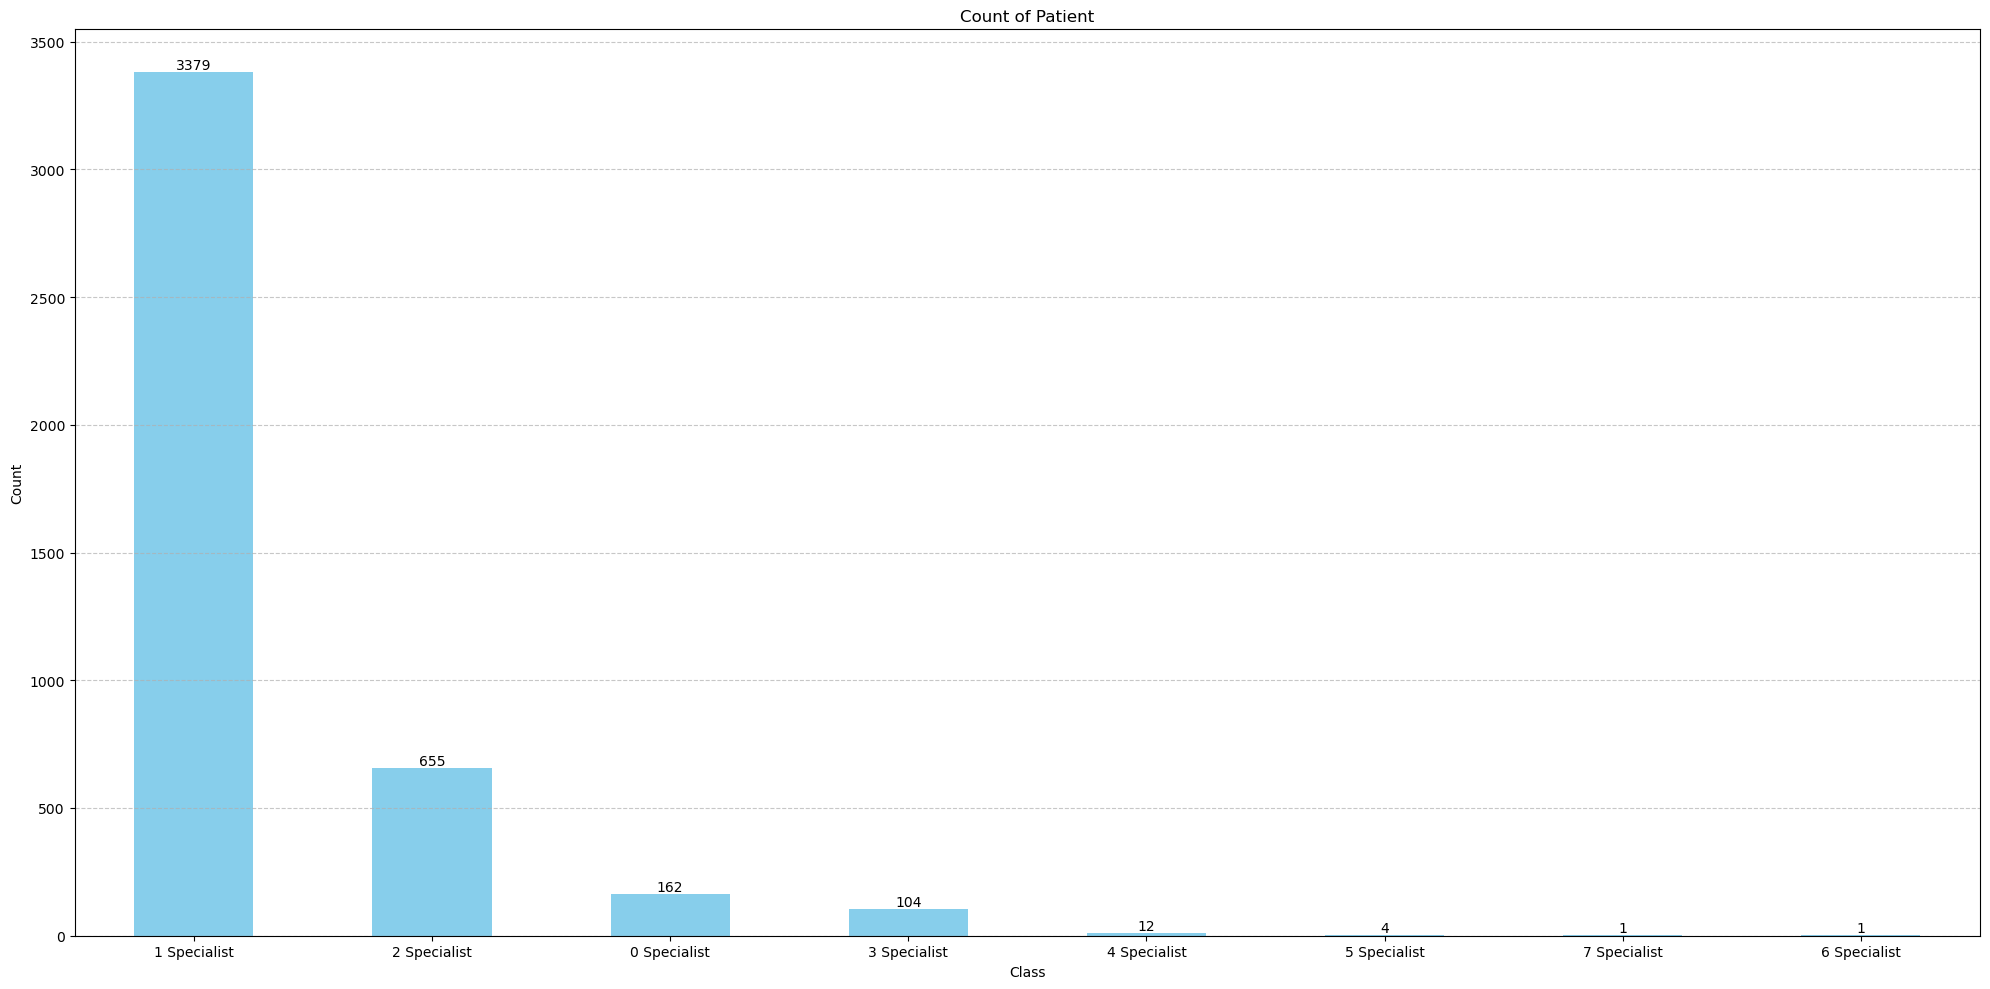

In [65]:
plt.figure(figsize=(20, 10))
bars = counts.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{bar.get_height()}', ha='center', va='bottom')

plt.title('Count of Patient')
plt.xlabel('Number of spescialist')
plt.ylabel('Count')

# Set the x-axis tick labels to the unique values of 'number_specialist' column
plt.xticks(range(len(counts)), [str(x) + " Specialist" for x in counts.index], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
bars.patches

<Axes.ArtistList of 8 patches>